In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.shape

(891, 12)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

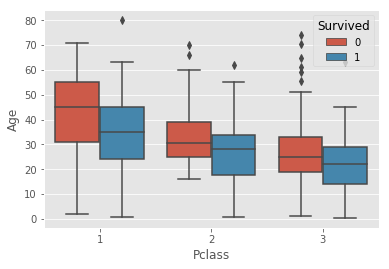

In [8]:
sns.boxplot(x='Pclass', y='Age', data=data, hue='Survived')

In [9]:
data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

# easy way to impute age!!

In [16]:
data['Age'] = data.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

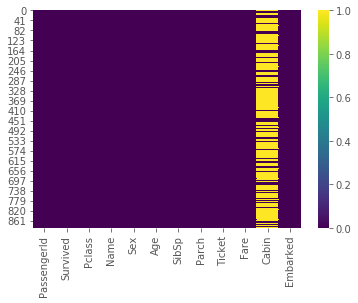

In [17]:
sns.heatmap(data.isnull(),cmap='viridis')

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

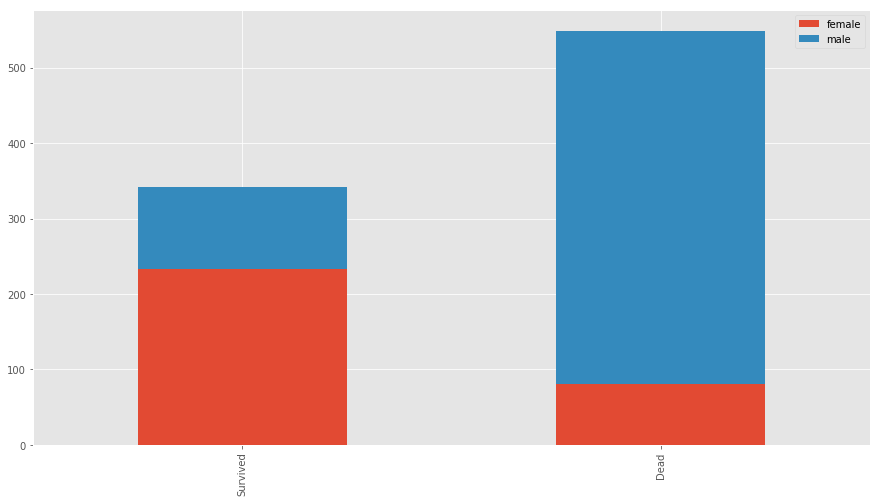

In [31]:
survived_sex = data[data['Survived'] == 1]['Sex'].value_counts()
dead_sex = data[data['Survived'] == 0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex], index = ['Survived','Dead'])
df.plot(kind='bar', stacked=True, figsize=(15,8))

/Users/gznl/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


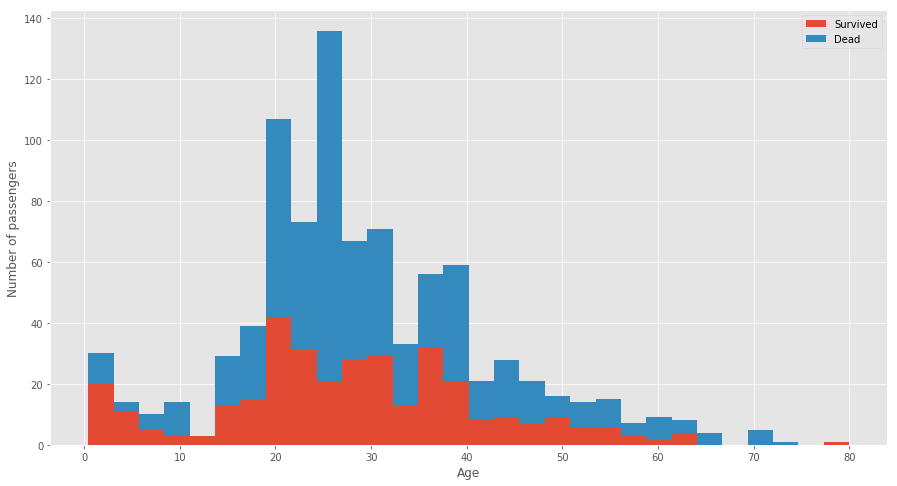

In [36]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived'] == 1]['Age'], data[data['Survived'] == 0]['Age']], 
         stacked=True, 
         label=['Survived', 'Dead'], bins=30)
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

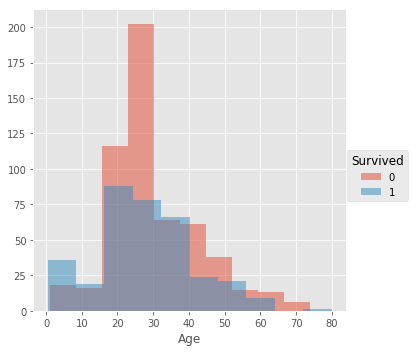

In [40]:
g = sns.FacetGrid(data, hue='Survived', size=5)
g = g.map(plt.hist, 'Age', alpha=0.5,).add_legend()

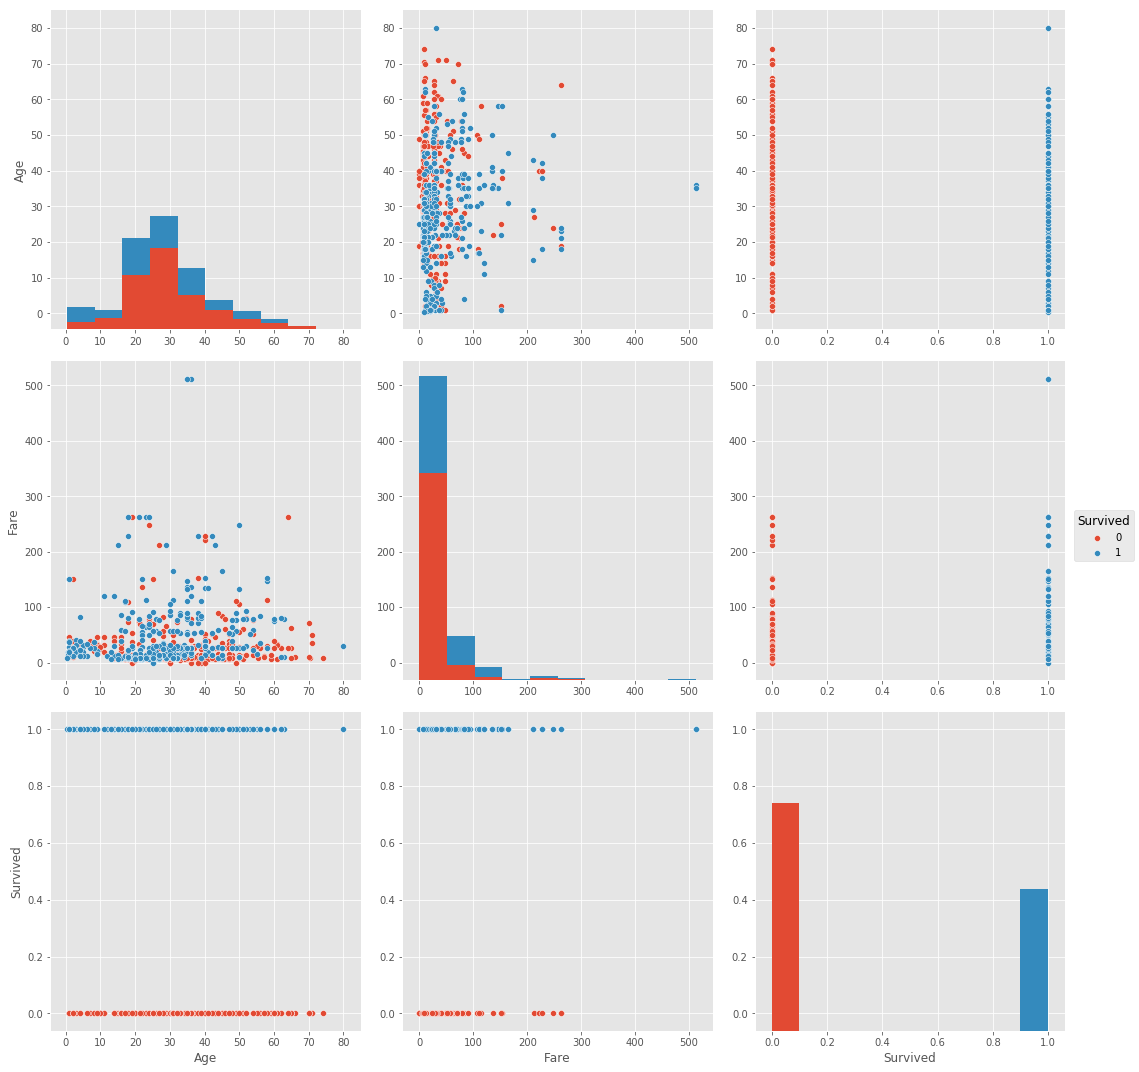

In [48]:
sns.pairplot(data[['Age','Fare','Survived']], hue='Survived', size=5)

# get combined data

In [52]:
def get_combined_data():
    
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    targets = train['Survived']
    train.drop('Survived', axis=1, inplace=True)
    
    combined = pd.concat([train,test])
    combined.reset_index(inplace=True)
    combined.drop('index', inplace=True, axis=1)
    
    return combined

In [69]:
combined = get_combined_data()

In [56]:
combined.shape

(1309, 11)

In [58]:
combined['Title'] = combined['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
combined['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Mme               1
Sir               1
Dona              1
Lady              1
Capt              1
Jonkheer          1
Don               1
the Countess      1
Name: Title, dtype: int64

In [59]:
def get_titles():
    
    global combined
    
    combined['Title'] = combined['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
    
    Title_Dict = {
        'Capt':        'Officer',
        'Col':         'Officer',
        'Major':       'Officer',
        'Jonkheer':    'Royalty',
        'Don':         'Royalty',
        'Sir':         'Royalty',
        'Dr':          'Officer',
        'Rev':         'Officer',
        'the Countess':'Royalty',
        'Dona':        'Royalty',
        'Mme':         'Mrs',
        'Mlle':        'Miss',
        'Ms':          'Mrs',
        'Mr':          'Mr',
        'Mrs':         'Mrs',
        'Miss':        'Miss',
        'Master':      'Master',
        'Lady':        'Royalty' 
    }
    
    combined['Title'] = combined['Title'].map(Title_Dict)

In [70]:
get_titles()

In [62]:
combined['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

In [71]:
combined.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

# age impute with mean value groupby sex and pclass

In [72]:
combined['Age'] = combined.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [78]:
combined['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

In [81]:
combined = pd.get_dummies(combined, columns=['Title'], drop_first=True)

In [82]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,0


# impute fare with mean value groupby pclass

In [89]:
combined['Fare'] = combined.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [93]:
combined.head(891)['Embarked'].fillna('S', inplace=True)
combined.iloc[891:]['Embarked'].fillna('S', inplace=True)
combined = pd.get_dummies(combined, columns=['Embarked'], drop_first=True)

/Users/gznl/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [98]:
combined = pd.get_dummies(combined, columns=['Sex'], drop_first=True)

In [103]:
combined['Cabin'].fillna('U', inplace=True)
combined['Cabin'] = combined['Cabin'].map(lambda cabin: cabin[0])
combined = pd.get_dummies(combined, columns=['Cabin'], drop_first=True)

In [107]:
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] +1

In [109]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 25 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Name             1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Sex_male         1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8
Cabin_T          1309 non-null uint8
Cabin_U          1309 non-null uint8

In [111]:
combined.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [114]:
X = combined.head(891)
train0 = pd.read_csv('train.csv')
y = train0['Survived']
test = combined.iloc[891:]

# modeling

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
cross_val_score(lr, X_train, y_train, cv=5)

array([ 0.75      ,  0.88333333,  0.78151261,  0.81512605,  0.83898305])

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
rf.fit(X_train, y_train)
cross_val_score(rf, X_train, y_train, cv=5)

array([ 0.79166667,  0.8       ,  0.80672269,  0.82352941,  0.8559322 ])

In [121]:
from sklearn.grid_search import GridSearchCV
parameters_grid = {
    'max_depth':[4,6,8],
    'n_estimators':[50,10],
    'max_features':['sqrt', 'auto', 'log2'],
    'min_samples_split':[1.0,3,10],
    'min_samples_leaf':[1,3,10],
    'bootstrap':[True,False]
}

gs = GridSearchCV(rf, scoring='accuracy', param_grid=parameters_grid, cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 6, 8], 'n_estimators': [50, 10], 'max_features': ['sqrt', 'auto', 'log2'], 'min_samples_split': [1.0, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [122]:
gs.best_params_

{'bootstrap': False,
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 10}

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
pred = gs.predict(X_test)
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86       175
          1       0.84      0.72      0.78       120

avg / total       0.83      0.83      0.83       295



[[158  17]
 [ 33  87]]


In [125]:
out = gs.predict(test)

In [127]:
aux = pd.read_csv('test.csv')
df_out = pd.DataFrame()
df_out['PassengerId'] = aux['PassengerId']
df_out['Survived'] = out
df_out.to_csv('rf_v01_submission.csv', index=False)

In [128]:
temp = pd.read_csv('rf_v01_submission.csv')

In [130]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB
